#### Procesamiento Digital de Señales

# Trabajo Práctico 3
#### Ramiro Castagnola

***
## Estimación espectral


In [1]:
## Inicialización del Notebook del TP3

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas import DataFrame
from IPython.display import HTML
import scipy.signal as sig

def Bartlett (N,x):
    
    ventana = sig.bartlett(N)
    
    salida = np.multiply(x,ventana)

    return salida

fs = 1000 # Hz

# Insertar aquí el código para inicializar tu notebook
########################################################


<div class="alert alert-block alert-info">
<b>1)</b> Compruebe experimentalmente las propiedades de sesgo y varianza del periodograma.
</div>

<div class="alert alert-block alert-success">
<b>Ayuda:</b> Puede utilizar una señal aleatoria con valores normalmente distribuidos de media nula y varianza **NO** unitaria, es decir $ x \sim \mathcal{N}(\mu=0,\sigma^2=2)$

</div>

Es decir, que el periodograma es un estimador de la densidad de potencia espectral (Ver Hayes 8.2.2):

$$ \hat{P_P}(e^{\frac{2\pi·k·f_S}{N}}) = \hat{P_P}(k) = \frac{1}{N}· \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza constante y **NO** depende de N.

In [2]:
# Simular para los siguientes tamaños de señal
N1 = [10, 50, 100, 250, 500, 1000, 5000]
variance1 = np.zeros(7)
bias1 = np.zeros(7)

for i in range (7):
    
    señalA = np.random.normal(0, 2, (N1[i]))
    Estimador = np.absolute((np.fft.fft(señalA))**2)/N1[i]
    variance1[i] = np.var(Estimador)
    bias1[i] = np.mean(Estimador/(2*np.pi))

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [3]:
#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [bias1[0], variance1[0]], # <-- acá debería haber numeritos :)
                   [bias1[1], variance1[1]], # <-- acá debería haber numeritos :)
                   [bias1[2], variance1[2]], # <-- acá debería haber numeritos :)
                   [bias1[3], variance1[3]], # <-- acá debería haber numeritos :)
                   [bias1[4], variance1[4]], # <-- acá debería haber numeritos :)
                   [bias1[5], variance1[5]], # <-- acá debería haber numeritos :)
                   [bias1[6], variance1[6]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_P$', '$v_P$'],
               index=N1)
HTML(df.to_html())


,$s_P$,$v_P$
10,0.594580,29.065279
50,0.740218,27.733053
100,0.636104,29.882520
250,0.647305,17.471461
500,0.617426,14.559487
1000,0.662132,17.679794
5000,0.653477,17.325513


<div class="alert alert-block alert-info">
<b>2)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Bartlett.

</div>

Es decir, que el periodograma de Bartlett es un estimador de la densidad de potencia espectral que promedia K bloques disjuntos de las N muestras de una señal $x$ (Ver Hayes 8.2.4):

$$ \hat{P_B}(k) = \frac{1}{N}· \sum^{K-1}_{i=0} \lvert X(k) \rvert ^2  $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente a medida que aumenta K.
 + tiene una resolución espectral K veces menor

In [4]:
# Simular para los siguientes tamaños de señal
K2 = 10
L2 = [10, 50, 100, 250, 500, 1000, 5000]

variance2 = np.zeros(7)
bias2 = np.zeros(7)

for i2 in range (7):
    
    acumuladoB = np.zeros((L2[i2]))

    for j in range(K2):
    
        señalB = np.random.normal(0,2,(L2[i2]))
        actualB = np.absolute((np.fft.fft(señalB))**2)/L2[i2]
        acumuladoB += actualB
        señal2 = acumuladoB/K2
        variance2[i2] = np.var(señal2)
        bias2[i2] = np.mean(señal2/(2*np.pi))

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [5]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [bias2[0], variance2[0]], # <-- acá debería haber numeritos :)
                   [bias2[1], variance2[1]], # <-- acá debería haber numeritos :)
                   [bias2[2], variance2[2]], # <-- acá debería haber numeritos :)
                   [bias2[3], variance2[3]], # <-- acá debería haber numeritos :)
                   [bias2[4], variance2[4]], # <-- acá debería haber numeritos :)
                   [bias2[5], variance2[5]], # <-- acá debería haber numeritos :)
                   [bias2[6], variance2[6]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_B$', '$v_B$'],
               index=L2)
HTML(df.to_html())


,$s_B$,$v_B$
10,0.695316,2.227577
50,0.660796,1.642615
100,0.638078,1.618915
250,0.644162,1.696025
500,0.628239,1.531921
1000,0.646010,1.668444
5000,0.633103,1.587653


<div class="alert alert-block alert-info">
<b>3)</b>     Compruebe del mismo modo los resultados de sesgo y varianza vistos en la teoría del método de Welch.

</div>

Es decir, que el periodograma de Welch es un estimador de la densidad de potencia espectral que promedia K bloques ventaneados por $w(n)$, posiblemente solapados de las N muestras de una señal $x$ (Ver Hayes 8.2.5):

$$ \hat{P_W}(k) = \frac{1}{K·L·U}· \sum^{K-1}_{i=0} \Bigg\vert \sum^{L-1}_{n=0}  x(n+i·D) · w(n) · e^{-j2\pi·k·n·\frac{f_S}{N}} \Bigg\vert^2   $$

 + **no sesgado asintóticamente** a medida que aumenta la ventana de registro N.
 + tiene varianza que decrece asintóticamente, a medida que se promedian más bloques de señal.
 + tiene una resolución espectral inversamente proporcional al tamaño del bloque.

In [6]:
# Simular para los siguientes tamaños de señal
L3 = [10, 50, 100, 250, 500, 1000, 5000]
K3 = 10
S = 2

variance3 = np.zeros(7)
bias3 = np.zeros(7)

for i3 in range (7):

    R = int(L3[i3]/S)
    acumuladoC = np.zeros((R))

    bartlett2 = Bartlett(L3[i3],1)
    U = sum(bartlett2**2)/L3[i3]

    for j in range(K3):
        for m in range(S):
            señalC = np.random.normal(0,2,(L3[i3]))
            bartlett1 = Bartlett(L3[i3]/S,señalC[R*m:R*m+R])
            actualC = np.absolute((np.fft.fft(bartlett1))**2)
            acumuladoC += actualC
            señal3 = acumuladoC/(K3*U*L3[i3])
            variance3[i3] = np.var(señal3)
            bias3[i3] = np.mean(señal3/(2*np.pi*L3[i3]*U))

##########################################
# Acá podés generar los gráficos pedidos #
##########################################


In [7]:

#######################################
# Tu simulación que genere resultados #
#######################################

tus_resultados = [ 
                   [bias3[0], variance3[0]], # <-- acá debería haber numeritos :)
                   [bias3[1], variance3[1]], # <-- acá debería haber numeritos :)
                   [bias3[2], variance3[2]], # <-- acá debería haber numeritos :)
                   [bias3[3], variance3[3]], # <-- acá debería haber numeritos :)
                   [bias3[4], variance3[4]], # <-- acá debería haber numeritos :)
                   [bias3[5], variance3[5]], # <-- acá debería haber numeritos :)
                   [bias3[6], variance3[6]], # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$s_W$', '$v_W$'],
               index=L3)
HTML(df.to_html())


,$s_W$,$v_W$
10,0.152743,0.067834
50,0.040915,0.856313
100,0.018259,0.596847
250,0.008015,0.840274
500,0.003743,0.607395
1000,0.001972,0.925710
5000,0.000387,0.812021


<div class="alert alert-block alert-info">
<b>4)</b> Evalue el siguiente estimador de frecuencia de una senoidal contaminada por ruido incorrelado.

</div>

Para una señal $ x(k) = a_1 · \mathop{sen}(\Omega_1·k) + n(k)$

siendo 

  $\Omega_1 = \Omega_0 + f_r·\frac{2\pi}{N} $

  $\Omega_0 = \frac{\pi}{2} $
  
y las variables aleatorias definidas por

  $f_r \sim \mathcal{U}(-\frac{1}{2}, \, \frac{1}{2}) $

  $n \sim \mathcal{N}(0, \, \sigma ^2) $
  
Evalúe el siguiente estimador de $\Omega_1$

  $\hat{\Omega}_1^W = \mathop{arg\ max}_f \{ \hat{P_W} \} $
  
basado en el periodograma de Welch evaluado en **3)**. Del mismo modo, evalúe otro estimador de la PSD para crear otro estimador de $\Omega_1$

  $\hat{\Omega}_1^X = \mathop{arg\ max}_f \{ \hat{P_X} \} $

Considere 200 realizaciones de 1000 muestras para cada experimento. Cada realización debe tener un SNR tal que el pico de la senoidal esté 3 y 10 db por encima del *piso* de ruido impuesto por $n(k)$.


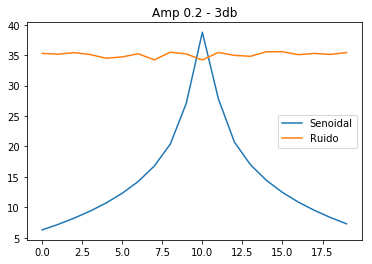

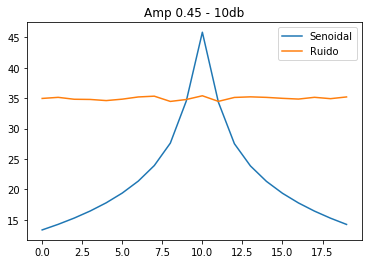

In [8]:
# Simular para los siguientes tamaños de señal

R = 200 # realizaciones

N = 1000 # Muestras

# Obtené los valores XX para que cumplas con el enunciado
#SNR = np.array([ XX, XX ], dtype=np.float)

##########################################
# Acá podés generar los gráficos pedidos #
##########################################
import numpy as np
import matplotlib.pylab as plt
import scipy.integrate as integrate
import scipy.signal as sig
import spectrum as sp
import warnings
warnings.filterwarnings('ignore')

fs = 1000

tt = np.linspace (0,((N-1)*(1/fs)),N)

Repeticiones = 200

a3db = 0.20

frecA = np.zeros(Repeticiones)
Acumulado3dbA = np.zeros(1000)
Acumulado3dbB = np.zeros(1000)

for h in range(Repeticiones):
        ruidoA = np.random.normal(0,2,N)
        frA = np.random.uniform(-0.5, 0.5, 1)
        O0A = 2*np.pi*(fs/4)
        O1A = O0A + frA*2*np.pi
        senoidalA = a3db*np.sin(O1A*tt) 
        señalA = senoidalA + ruidoA
        
        Sen3db = np.absolute(np.fft.fft(senoidalA))
        
        Rui3db = np.absolute(np.fft.fft(ruidoA))
        
        _, PxxSeñalA = sig.welch(señalA, fs=fs, nfft=N, window='bartlett', nperseg=int(np.round(N/3)) )        
        
        MaxfrecA = max(PxxSeñalA)
        countA = -1
        for x in PxxSeñalA:
            countA = 1+countA   
            if x == MaxfrecA:       
                frecA[h] = countA
        
        Acumulado3dbA = Sen3db + Acumulado3dbA
        Acumulado3dbB = Rui3db + Acumulado3dbB

SenProm3db = Acumulado3dbA / Repeticiones 
RuiProm3db = Acumulado3dbB / Repeticiones
       
plt.figure(1)
plt.title('Amp 0.2 - 3db')
plt.plot(20*np.log10(SenProm3db[240:260]),label='Senoidal')
plt.plot(20*np.log10(RuiProm3db[240:260]),label='Ruido')
axes_hdl = plt.gca()
axes_hdl.legend()
        
maximoSen3db = max(20*np.log10(SenProm3db))
maximoRui3db = max(20*np.log10(RuiProm3db))
        
        
varianceA = np.var(frecA)

SesgoA = sum(frecA - 250) / 200



#################################################################

frecB = np.zeros(Repeticiones)

for j in range(Repeticiones):
        ruidoB = np.random.normal(0,2,N)
        frB = np.random.uniform(-0.5, 0.5, 1)
        O0B = 2*np.pi*(fs/4)
        O1B = O0B + frB*2*np.pi
        senoidalB = a3db*np.sin(O1B*tt)
        señalB = senoidalB + ruidoB            
    
        pARMASeñalB = sp.parma(señalB, 8, 8, 30, NFFT=N)
            
        MaxfrecB = max(pARMASeñalB.psd)
        countB = -1
        for y in pARMASeñalB.psd:
            countB = 1+countB   
            if y == MaxfrecB:       
                frecB[j] = countB
        
               
varianceB = np.var(frecB)   

SesgoB = sum(frecB - 250) / 200
    
###################################################################    

a10db = 0.45

frecC = np.zeros(Repeticiones)
Acumulado10dbA = np.zeros(1000)
Acumulado10dbB = np.zeros(1000)

for k in range(Repeticiones):
        ruidoC = np.random.normal(0,2,N)
        frC = np.random.uniform(-0.5, 0.5, 1)
        O0C = 2*np.pi*(fs/4)
        O1C = O0C + frC*2*np.pi
        senoidalC = a10db*np.sin(O1C*tt) 
        señalC = senoidalC + ruidoC
        
        Sen10db = np.absolute(np.fft.fft(senoidalC))
        
        Rui10db = np.absolute(np.fft.fft(ruidoC))
        
        _, PxxSeñalC = sig.welch(señalC, fs=fs, nfft=N, window='bartlett', nperseg=int(np.round(N/3)) )        
        
        MaxfrecC = max(PxxSeñalC)
        countC = -1
        for z in PxxSeñalC:
            countC = 1+countC   
            if z == MaxfrecC:       
                frecC[k] = countC
        
        Acumulado10dbA = Sen10db + Acumulado10dbA
        Acumulado10dbB = Rui10db + Acumulado10dbB

SenProm10db = Acumulado10dbA / Repeticiones 
RuiProm10db = Acumulado10dbB / Repeticiones
       
plt.figure(2)
plt.title('Amp 0.45 - 10db')
plt.plot(20*np.log10(SenProm10db[240:260]),label='Senoidal')
plt.plot(20*np.log10(RuiProm10db[240:260]),label='Ruido')
axes_hdl = plt.gca()
axes_hdl.legend()
        
maximoSen10db = max(20*np.log10(SenProm10db))
maximoRui10db = max(20*np.log10(RuiProm10db))
        
        
varianceC = np.var(frecC) 

SesgoC = sum(frecC - 250) / 200 

####################################################################

frecD = np.zeros(Repeticiones)

for l in range(Repeticiones):
        ruidoD = np.random.normal(0,2,N)
        frD = np.random.uniform(-0.5, 0.5, 1)
        O0D = 2*np.pi*(fs/4)
        O1D = O0D + frD*2*np.pi
        senoidalD = a10db*np.sin(O1D*tt)
        señalD = senoidalD + ruidoD            
    
        pARMASeñalD = sp.parma(señalD, 8, 8, 30, NFFT=N)
    
        MaxfrecD = max(pARMASeñalD.psd)
        countD = -1
        for w in pARMASeñalD.psd:
            countD = 1+countD   
            if w == MaxfrecD:       
                frecD[l] = countD
        
               
varianceD = np.var(frecD)

SesgoD = sum(frecD - 250) / 200



In [9]:
#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [maximoSen3db, maximoRui3db], # <-- acá debería haber numeritos :)
                   [maximoSen10db, maximoRui10db] # <-- acá debería haber numeritos :)
                 ]
df = DataFrame(tus_resultados, columns=['$Senoidal$', '$Ruido$'],
               index=[  
                        '3 dB',
                        '10 dB'
                     ])
HTML(df.to_html())

,$Senoidal$,$Ruido$
3 dB,38.759740,36.089020
10 dB,45.829352,35.979243


   a) ¿Qué estimador ha elegido? Explique brevemente los fundamentos principales y el enfoque del método elegido.


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> El metodo ARMA cuenta con la unión de un modelo autoregresivo, el cual seria un filtro de respuesta infinita, junto a un modelo de media movil, que seria un filtro de respuesta finita. Este metodo intenta utilizar informacion a priori para asi lograr un mayor rendimiento, sin embargo puede verse afectado en mayor grado a valores atipicos.
</div>

   b) ¿Qué indicador considera que sería apropiado para poder comparar el rendimiento de ambos estimadores $i_j$?


<div class="alert alert-block alert-warning">
<b>Respuesta:</b> Mediante la varianza se aprecia correctamente la mejora que surge de aumentar la distancia entre el ruido y el pico de la señal a estimar.
</div>

In [11]:

#######################################
# Tu simulación que genere resultados #
#######################################

# Una vez definido tu indicador de performance, calculalo y comparalo para las situaciones pedidas.
tus_resultados = [ 
                   [varianceA, SesgoA], 
                   [varianceC, SesgoC],
                   [varianceB, SesgoB],
                   [varianceD, SesgoD]
                 ]
df = DataFrame(tus_resultados, columns=['$Varianza$', '$Sesgo$'],
               index=[  
                        'Welch 3 dB',
                        'Welch 10 dB',
                        'ARMA 3 dB',
                        'ARMA 10 dB'
                     ])
HTML(df.to_html())


,$Varianza$,$Sesgo$
Welch 3 dB,19403.265100,1.070
Welch 10 dB,5945.797975,0.455
ARMA 3 dB,23734.972975,0.795
ARMA 10 dB,13209.601600,-3.780
